# Reviewing Logs

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [2]:
# reading the dataset

In [3]:
dataset = pd.read_csv("datasets/mylogs.csv")

In [4]:
dataset.columns

Index(['IP', 'date', 'output'], dtype='object')

In [5]:
dataset.head()

,IP,date,output
0,192.168.43.37,29/Jun/2020:15:59:09 +0530,GET /hack.html HTTP/1.1
1,192.168.43.37,29/Jun/2020:15:59:18 +0530,GET /favicon.ico HTTP/1.1
2,192.168.43.98,29/Jun/2020:16:02:52 +0530,403 3985
3,192.168.43.98,29/Jun/2020:16:02:52 +0530,403 3985
4,192.168.43.98,29/Jun/2020:16:02:52 +0530,403 3985


In [6]:
dataset['IP'].head(10)

0    192.168.43.37
1    192.168.43.37
2    192.168.43.98
3    192.168.43.98
4    192.168.43.98
5    192.168.43.98
6    192.168.43.98
7    192.168.43.98
8    192.168.43.98
9    192.168.43.98
Name: IP, dtype: object

In [7]:
# now we have to extract the last values of the ip
dataset['IP'].value_counts()

192.168.43.98      29408
83.149.9.216          23
93.114.45.13           6
110.136.166.128        5
192.168.43.37          2
46.105.14.53           1
66.249.73.185          1
24.236.252.67          1
50.16.19.13            1
66.249.73.135          1
Name: IP, dtype: int64

In [8]:
# our algo can't work on this kind of data so we will have to convert it into some form so that it can be understood well

In [9]:
# for that we will use Label Encoding

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. 
Machine learning algorithms can then decide in a better way on how those labels must be operated

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#creating the object for this
label_encoder = LabelEncoder()

In [12]:
Labeled_Ips = label_encoder.fit_transform(dataset['IP']) 

In [13]:
Labeled_Ips

array([1, 1, 2, ..., 0, 0, 0])

In [14]:
Labeled_date = label_encoder.fit_transform(dataset['date'])

In [15]:
Labeled_date

array([32, 33, 34, ...,  1, 21, 15])

In [16]:
Labeled_output = label_encoder.fit_transform(dataset['output'])

In [17]:
Labeled_output

array([29, 28, 25, ..., 33, 28, 20])

In [18]:
# converting all to dataframe
Labeled_Ips = pd.DataFrame(Labeled_Ips)
Labeled_date = pd.DataFrame(Labeled_date)
Labeled_output = pd.DataFrame(Labeled_output)


In [19]:
Labeled_Ips.head(5)

,0
0,1
1,1
2,2
3,2
4,2


In [20]:
Labeled_date.head(5)

,0
0,32
1,33
2,34
3,34
4,34


In [21]:
Labeled_output.head(5)

,0
0,29
1,28
2,25
3,25
4,25


In [22]:
type(Labeled_output)

pandas.core.frame.DataFrame

In [23]:
Labeled_output.rename(columns={0:'Output'},inplace =True)

In [24]:
Labeled_date.rename(columns={0:'Date'},inplace =True)

In [25]:
Labeled_Ips.rename(columns={0:'Ips'},inplace =True)

In [26]:
Labeled_Ips.head(5)

,Ips
0,1
1,1
2,2
3,2
4,2


In [27]:
Labeled_date.head(5)

,Date
0,32
1,33
2,34
3,34
4,34


In [28]:
Labeled_output.head(5)

,Output
0,29
1,28
2,25
3,25
4,25


In [29]:
new_data = pd.concat([Labeled_Ips,Labeled_date,Labeled_output],axis=1)

In [30]:
new_data.head()

,Ips,Date,Output
0,1,32,29
1,1,33,28
2,2,34,25
3,2,34,25
4,2,34,25


In [31]:
new_data['Ips'].value_counts()

2    29408
8       23
9        6
0        5
1        2
7        1
6        1
5        1
4        1
3        1
Name: Ips, dtype: int64

In [32]:
new_data['Ips'].value_counts().values

array([29408,    23,     6,     5,     2,     1,     1,     1,     1,
           1], dtype=int64)

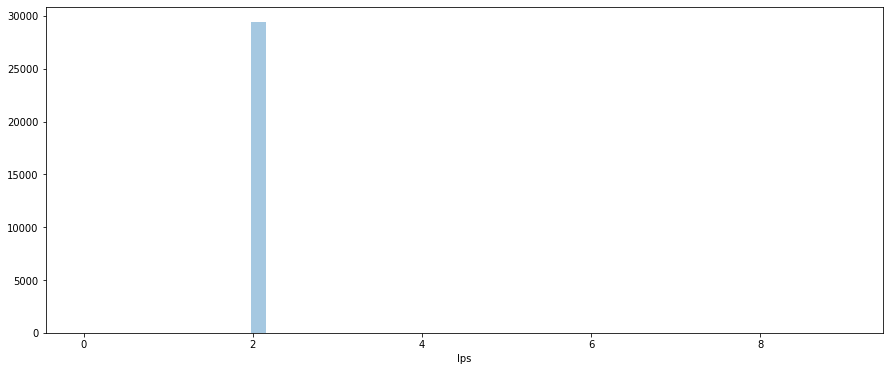

In [33]:
plt.subplots(figsize=(15,6))
sns.distplot(new_data['Ips'],kde=False)
plt.show()

In [34]:
# applying clustering algorithm on the scaled data
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaled_data = scaler.fit_transform(new_data)

In [37]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7)

In [38]:
model.fit(scaled_data)

KMeans(n_clusters=7)

In [39]:
pred = model.predict(scaled_data)

In [40]:
SCALED_DATASET = pd.DataFrame(scaled_data , columns=['IP', 'DATE','client'])

In [41]:
SCALED_DATASET['cluster'] = pred

In [42]:
ips = [dataset['IP'], new_data['Ips']]

In [43]:
final_ip_sets = pd.concat(ips , axis=1)

In [44]:
final_ip_sets.head()

,IP,Ips
0,192.168.43.37,1
1,192.168.43.37,1
2,192.168.43.98,2
3,192.168.43.98,2
4,192.168.43.98,2


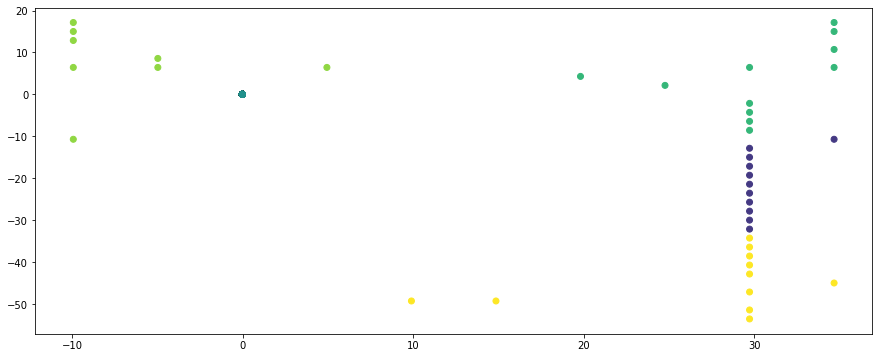

In [45]:
plt.subplots(figsize=(15,6))
plt.scatter(SCALED_DATASET['IP'], SCALED_DATASET['client'], c=SCALED_DATASET['cluster'])
plt.show()

In [46]:
count = dataset.groupby('IP').count()

In [47]:
count

,date,output
IP,,
110.136.166.128,5,5
192.168.43.37,2,2
192.168.43.98,29408,29408
24.236.252.67,1,1
46.105.14.53,1,1
50.16.19.13,1,1
66.249.73.135,1,1
66.249.73.185,1,1
83.149.9.216,23,23


In [48]:
# so from the above we can see that IP 192.168.43.98 is the suspecious IP